In [10]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [11]:
dataDir='/storage/remote/atcremers40/motion_seg/datasets/video_agnostic'
dataType='train'
annFile='{}/annotations/KITTIMOTS_MOSeg_{}.json'.format(dataDir,dataType)

# Initialize the COCO api 
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

nms=[cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}\n'.format(' '.join(nms)))

print(cats)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!

COCO categories: 
moving static

COCO supercategories: 
moving static

[{'id': 0, 'name': 'moving', 'supercategory': 'moving'}, {'id': 1, 'name': 'static', 'supercategory': 'static'}]


### Visualizing the first image with instance masks afterwards

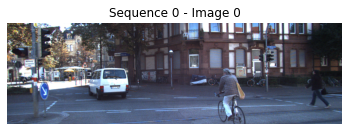

In [12]:
img = coco.loadImgs(0)[0]
I = io.imread('{}/training/image_02/{}'.format(dataDir,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.title("Sequence 0 - Image 0")
plt.show()

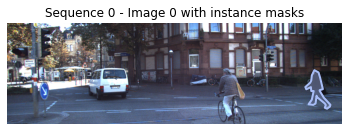

In [13]:
plt.imshow(I)
plt.title("Sequence 0 - Image 0 with instance masks")
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIDs, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

### Showing example image with only moving objects

Number of images containing all the  classes: 2495


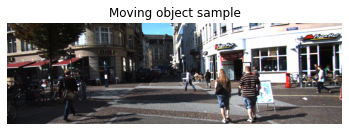

In [14]:
filteredClasses = ['moving']

# Use only filtered categories
catIds = coco.getCatIds(catNms=filteredClasses) 

imgIds = coco.getImgIds(catIds=catIDs)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/training/image_02/{}'.format(dataDir,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.title("Moving object sample")
plt.show()

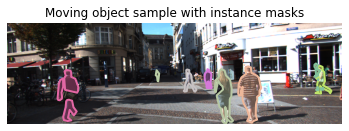

In [15]:
plt.imshow(I)
plt.title("Moving object sample with instance masks")
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

### Showing example images with only static objects

Number of images containing all the  classes: 3135


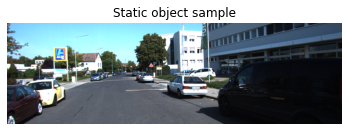

In [20]:
filteredClasses = ['static']

# Use only filtered categories
catIds = coco.getCatIds(catNms=filteredClasses) 

# Image Ids from filtered categories
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/training/image_02/{}'.format(dataDir,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.title("Static object sample")
plt.show()

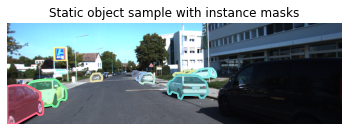

In [21]:
plt.imshow(I)
plt.title("Static object sample with instance masks")
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)